In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('csv/calendar.csv', parse_dates=True)
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,15883,2019-11-20,f,$106.00,$106.00,1,999
1,532596,2019-11-20,f,$160.00,$160.00,28,100
2,532596,2019-11-21,f,$160.00,$160.00,28,100
3,532596,2019-11-22,t,$160.00,$160.00,28,100
4,532596,2019-11-23,t,$160.00,$160.00,28,100


In [4]:
grp=df.groupby('listing_id').first()
grp

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
15883,2019-11-20,f,$106.00,$106.00,1,999
38768,2019-11-20,t,$50.00,$50.00,3,100
40625,2019-11-20,t,$85.00,$85.00,1,180
51287,2019-11-20,f,$45.00,$45.00,3,100
70568,2019-11-20,t,$59.00,$59.00,3,365
...,...,...,...,...,...,...
40227279,2019-11-20,t,$60.00,$60.00,2,1125
40227463,2019-11-20,f,$50.00,$50.00,1,1125
40228112,2019-11-20,t,$60.00,$60.00,2,1125


In [278]:
grp=grp[['date','price','minimum_nights']]
grp.head()

,date,price,minimum_nights
listing_id,,,
15883,2019-11-20,$106.00,1
38768,2019-11-20,$50.00,3
40625,2019-11-20,$85.00,1
51287,2019-11-20,$45.00,3
70568,2019-11-20,$59.00,3


In [277]:
grp.first()

TypeError: first() missing 1 required positional argument: 'offset'

In [6]:
grp.to_csv("calendarGrouped.csv")

In [7]:
result=df[['listing_id','date','price','minimum_nights']].sort_values(by=['listing_id'])

In [8]:
result.head(5)

,listing_id,date,price,minimum_nights
0,15883,2019-11-20,$106.00,1
1447,15883,2020-03-16,$129.00,1
1448,15883,2020-03-17,$110.00,1
1449,15883,2020-03-18,$110.00,1
1450,15883,2020-03-19,$110.00,1


In [9]:
result.to_csv("calendarS.csv")

In [56]:
df=pd.read_csv('calendarS.csv', parse_dates=["date"])

In [57]:
df['date'].isnull().sum()

0

In [58]:
type(df.date[10])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
df['price'].isnull().sum()

176

In [69]:
new_df=df.fillna(method='ffill')
new_df['price'].isnull().sum()

0

In [70]:
type(new_df.price[0])
new_df['price']=new_df.price.str.replace(',', '')
new_df['price']=new_df.price.str.replace('$', '')
new_df['price']=new_df.price.str.replace('.', '')

In [71]:
new_df['price']=new_df['price'].astype(float)
type(new_df.price[0])

numpy.float64

In [72]:
new_df.head()

,Unnamed: 0,listing_id,date,price,minimum_nights
0,0,15883,2019-11-20,10600.0,1
1,1447,15883,2020-03-16,12900.0,1
2,1448,15883,2020-03-17,11000.0,1
3,1449,15883,2020-03-18,11000.0,1
4,1450,15883,2020-03-19,11000.0,1


In [284]:
# def real_money(price):
#     return price 10

# new_df['price'].apply(real_money)
new_df['price']=new_df['price'].div(100)
new_df

,Unnamed: 0,date,price,minimum_nights
listing_id,,,,
15883,0,2019-11-20,1.06,1
15883,1447,2020-03-16,1.29,1
15883,1448,2020-03-17,1.10,1
15883,1449,2020-03-18,1.10,1
15883,1450,2020-03-19,1.10,1
...,...,...,...,...
40233508,4554777,2020-06-12,0.21,60
40233508,4554778,2020-06-13,0.21,60
40233508,4554779,2020-06-14,0.21,60


In [285]:
new_df.to_csv('prices_per_date.csv')

In [286]:
yax=new_df

# yax.loc[15883]
yax['isting_id']

KeyError: 'isting_id'

In [ ]:
yax=yax.loc[15883]
yax

In [144]:
yax.head()

,Unnamed: 0,price,minimum_nights
date,,,
2019-11-20,0,106.0,1
2020-03-16,1447,129.0,1
2020-03-17,1448,110.0,1
2020-03-18,1449,110.0,1
2020-03-19,1450,110.0,1


In [264]:
dates=yax
dates

,Unnamed: 0,price,minimum_nights
date,,,
2019-11-20,0,106.0,1
2020-03-16,1447,129.0,1
2020-03-17,1448,110.0,1
2020-03-18,1449,110.0,1
2020-03-19,1450,110.0,1
...,...,...,...
2020-10-16,2473,110.0,1
2020-10-14,2471,110.0,1
2019-11-21,834,106.0,1


In [265]:
dates.drop(['minimum_nights'], axis=1)
dates

,Unnamed: 0,price,minimum_nights
date,,,
2019-11-20,0,106.0,1
2020-03-16,1447,129.0,1
2020-03-17,1448,110.0,1
2020-03-18,1449,110.0,1
2020-03-19,1450,110.0,1
...,...,...,...
2020-10-16,2473,110.0,1
2020-10-14,2471,110.0,1
2019-11-21,834,106.0,1


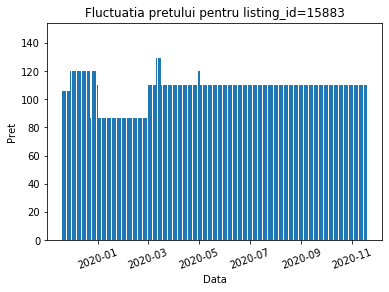

In [266]:
plt.bar(dates.index, dates.price)

plt.title("Fluctuatia pretului pentru listing_id=15883")
plt.ylabel('Pret')
plt.xlabel('Data')
plt.xticks(rotation = 20)
plt.show()

In [196]:
yax2=new_df
yax2=yax2.loc[532596]
yax2

,Unnamed: 0,date,price,minimum_nights
listing_id,,,,
532596,318,2020-10-02,179.0,28
532596,319,2020-10-03,179.0,28
532596,320,2020-10-04,179.0,28
532596,13,2019-12-02,140.0,28
532596,308,2020-09-22,179.0,28
...,...,...,...,...
532596,156,2020-04-23,150.0,28
532596,155,2020-04-22,150.0,28
532596,105,2020-03-03,150.0,28


In [197]:
yax2=yax2.set_index('date')

In [198]:
yax2.index.min()

Timestamp('2019-11-20 00:00:00')

In [199]:
yax2.index.max()

Timestamp('2020-11-18 00:00:00')

In [267]:
dates_2=yax2
dates_2

,Unnamed: 0,price,minimum_nights
date,,,
2020-10-02,318,179.0,28
2020-10-03,319,179.0,28
2020-10-04,320,179.0,28
2019-12-02,13,140.0,28
2020-09-22,308,179.0,28
...,...,...,...
2020-04-23,156,150.0,28
2020-04-22,155,150.0,28
2020-03-03,105,150.0,28


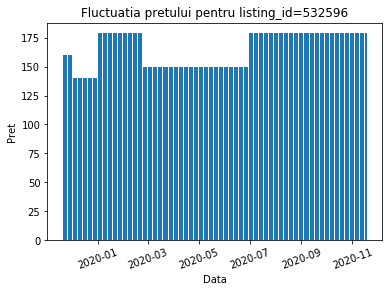

In [268]:
plt.bar(dates_2.index, dates_2.price)

plt.title("Fluctuatia pretului pentru listing_id=532596")
plt.ylabel('Pret')
plt.xlabel('Data')
plt.xticks(rotation = 20)
plt.show()

In [206]:
yax3=new_df
yax3=yax3.loc[536895]
yax3

,Unnamed: 0,date,price,minimum_nights
listing_id,,,,
536895,413,2020-01-06,59.0,4
536895,437,2020-01-30,57.0,4
536895,438,2020-01-31,62.0,4
536895,439,2020-02-01,62.0,4
536895,440,2020-02-02,59.0,4
...,...,...,...,...
536895,1006,2020-06-12,62.0,4
536895,1009,2020-06-15,59.0,4
536895,1005,2020-06-11,59.0,4


In [208]:
yax3=yax3.set_index('date')

In [262]:
dates_3=yax3
dates_3

,Unnamed: 0,price,minimum_nights
date,,,
2020-01-06,413,59.0,4
2020-01-30,437,57.0,4
2020-01-31,438,62.0,4
2020-02-01,439,62.0,4
2020-02-02,440,59.0,4
...,...,...,...
2020-06-12,1006,62.0,4
2020-06-15,1009,59.0,4
2020-06-11,1005,59.0,4


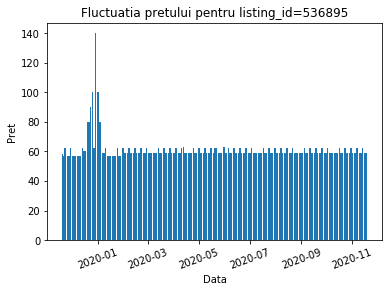

In [263]:
plt.bar(dates_3.index, dates_3.price)

plt.title("Fluctuatia pretului pentru listing_id=536895")
plt.ylabel('Pret')
plt.xlabel('Data')
plt.xticks(rotation = 20)
plt.show()

In [252]:
from matplotlib.pyplot import figure


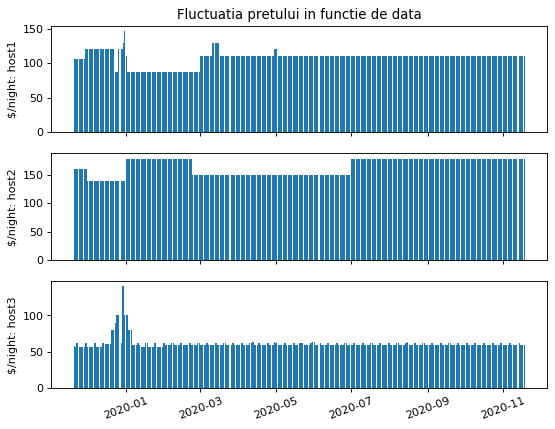

In [269]:
figure(num=None, figsize=(8,6), dpi=80, facecolor='w',edgecolor='k')
ax1=plt.subplot(311)
plt.title('Fluctuatia pretului in functie de data')
plt.ylabel('$/night: host1')
plt.bar(dates.index, dates.price)
ax2=plt.subplot(312, sharex=ax3)
plt.ylabel('$/night: host2')
plt.bar(dates_2.index, dates_2.price)
ax3=plt.subplot(313, sharex=ax3)
plt.ylabel('$/night: host3', rotation=90)
plt.bar(dates_3.index, dates_3.price)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.xticks(rotation=20)
plt.show()

In [259]:
df

,Unnamed: 0,listing_id,date,price,minimum_nights
0,0,15883,2019-11-20,$106.00,1
1,1447,15883,2020-03-16,$129.00,1
2,1448,15883,2020-03-17,$110.00,1
3,1449,15883,2020-03-18,$110.00,1
4,1450,15883,2020-03-19,$110.00,1
...,...,...,...,...,...
4604470,4554777,40233508,2020-06-12,$21.00,60
4604471,4554778,40233508,2020-06-13,$21.00,60
4604472,4554779,40233508,2020-06-14,$21.00,60
4604473,4554766,40233508,2020-06-01,$21.00,60


In [260]:
new_df

,Unnamed: 0,date,price,minimum_nights
listing_id,,,,
15883,0,2019-11-20,106.0,1
15883,1447,2020-03-16,129.0,1
15883,1448,2020-03-17,110.0,1
15883,1449,2020-03-18,110.0,1
15883,1450,2020-03-19,110.0,1
...,...,...,...,...
40233508,4554777,2020-06-12,21.0,60
40233508,4554778,2020-06-13,21.0,60
40233508,4554779,2020-06-14,21.0,60


In [261]:
new_df.to_csv('calendar2.csv')